In [1]:
%matplotlib inline

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import datetime

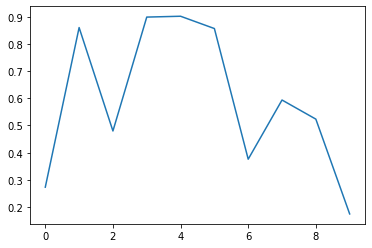

In [14]:
x = np.arange(10)
y = np.random.rand(10)
plt.plot(x, y)

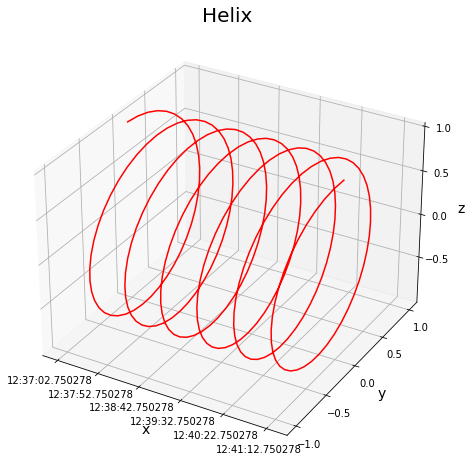

In [48]:
# Figureを追加
fig = plt.figure(figsize = (8, 8))

# 3DAxesを追加
ax = fig.add_subplot(111, projection='3d')

# Axesのタイトルを設定
ax.set_title("Helix", size = 20)

# 軸ラベルを設定
ax.set_xlabel("x", size = 14)
ax.set_ylabel("y", size = 14)
ax.set_zlabel("z", size = 14)

# 軸目盛を設定
ax.set_yticks([-1.0, -0.5, 0.0, 0.5, 1.0])
ax.set_zticks([-1.0, -0.5, 0.0, 0.5, 1.0])

# 円周率の定義
pi = np.pi

# パラメータ分割数
n = 256

# パラメータtを作成
t = np.linspace(-6*pi, 6*pi, n)

x0 = datetime.datetime.now()

# らせんの方程式
x_ticks_labels = [x0 + datetime.timedelta(seconds=i) for i in range(256)]

x = np.arange(256)

x_ticks = np.arange(0, 256, 50)
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticks_labels[i].time() for i in x_ticks)

# print(x)
y = np.sin(t)
z = np.cos(t)

# 曲線を描画
ax.plot(x, y, z, color = "red")

plt.show()

In [28]:
dt = datetime.datetime.now()
dt = dt.replace(year=1999, month=8, day=1, hour=2, minute=5, second=7)
print(dt)
print(type(dt))

1999-08-01 02:05:07.380117
<class 'datetime.datetime'>
